# Assignment 2: Rotation and Transformation Basics

CHRIS SUNNY THALIYATH
2023 PAI 9051
chrissunny94@gmail.com

Dated: April 20, 2024, submission due: April 28, 2024
Objective: The objective of this assignment is to solidify students' understanding of
rotation, transformation, and other basic operations in computer vision. Students will
implement these operations from scratch using a programming language (e.g., Python)
and basic libraries like NumPy.


Task 1: Rotation Implementation

1)  Implement a function to perform rotation on a given image by a specified angle
(in degrees).

2)  Apply the rotation function to a set of images with varying rotation angles (e.g.,
30°, 60°, -45°) and visualize the results.

3)  Compare the results of your rotation implementation with a built-in rotation
function from a popular image processing library (e.g., OpenCV). Discuss any
differences or similarities observed.

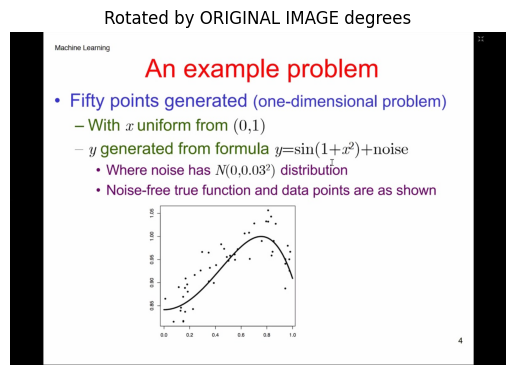

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def display_image(image,text):
  # Read the image using OpenCV (or Pillow)  
  if image is not None:
    # Convert BGR to RGB for matplotlib display
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')  # Optional: Hide axes
    plt.title(f"Rotated by {text} degrees")
    plt.show()
  else:
    print(f"Error: File '{image_path}' not found.")

# Example usage
image_path = "/Users/christhaliyath/MTECH/IIT_jammu_mtech_artificial_intelligence_machine_learning/SECOND_SEM/Machine Learning   (core)	Dr. Karan Nathwani/Assignment_1/WhatsApp Image 2024-02-16 at 20.00.35.jpeg"  # Replace with your actual image path
image = cv2.imread(image_path)

display_image(image,"ORIGINAL IMAGE")


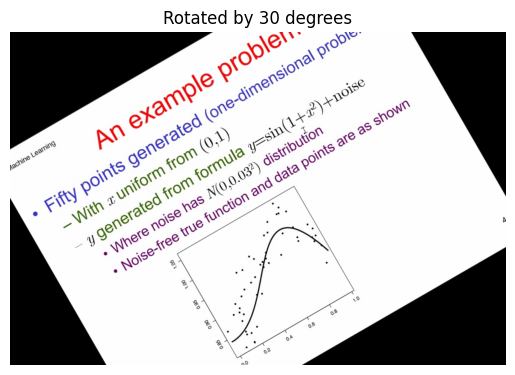

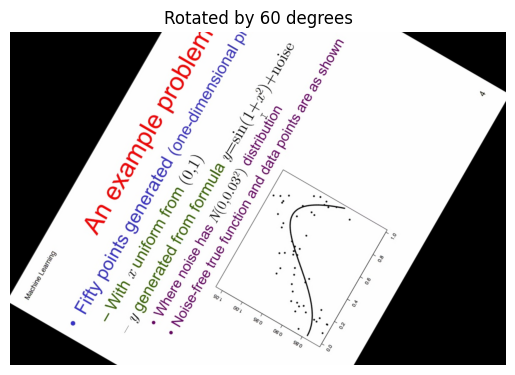

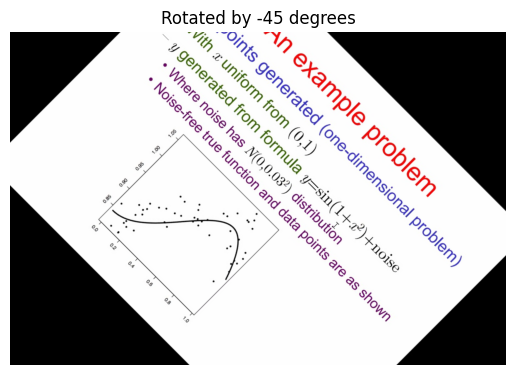

In [21]:
def rotate_image(image, angle):
  radians = np.radians(angle)# Convert angle to radians
  h, w = image.shape[:2]# Get image height and width
  center = (w // 2, h // 2)# Define the rotation center as the image center
  rot_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)# Create the rotation matrix
  rotated_image = cv2.warpAffine(image, rot_matrix, (w, h))# Apply affine transformation with rotation matrix
  return rotated_image

# Define rotation angles
angles = [30, 60, -45]

for angle in angles:
  rotated_image = rotate_image(image.copy(), angle)
  display_image(rotated_image,angle)

Task 2: Transformation Matrix Calculation

1. Implement a function to calculate the transformation matrix for a given
translation (dx, dy) and scaling factors (sx, sy).

2. Apply the transformation matrix to a set of images along with the translation and
scaling parameters.

3. Visualize and compare the transformed images with the original ones.


In [22]:
def get_transformation_matrix(dx, dy, sx, sy):
  output_np_array =np.array([[sx, 0, dx], [0, sy, dy], [0, 0, 1]])
  return output_np_array


# Define transformation parameters
dx = 20  # Horizontal translation (pixels)
dy = 50  # Vertical translation (pixels)
sx = 1.2  # Scaling factor in x-direction
sy = 0.8  # Scaling factor in y-direction

# Get the transformation matrix
transform_matrix = get_transformation_matrix(dx, dy, sx, sy)

# Apply the transformation using cv2.warpAffine
transformed_image = cv2.warpAffine(image.copy(), transform_matrix, (image.shape[1], image.shape[0]))

# Visualize original and transformed images
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title("Transformed Image")
plt.show()


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/imgwarp.cpp:2757: error: (-215:Assertion failed) (M0.type() == CV_32F || M0.type() == CV_64F) && M0.rows == 2 && M0.cols == 3 in function 'warpAffine'


Task 3: Combining Transformations

1. Implement a function that combines multiple transformations (e.g., rotation
followed by translation).

2. Apply the combined transformation to a set of images and visualize the results.

3. Discuss the order of applying transformations and its impact on the final outcome.
Note: Students are expected to provide clear and concise code explanations, visualize
their results effectively, and critically analyze the outcomes of each task. 

Collaboration
and seeking guidance are encouraged, but each student should submit their own code
and written solutions.

Transformation matrix shape: (2, 3)
Transformation matrix data type: float32


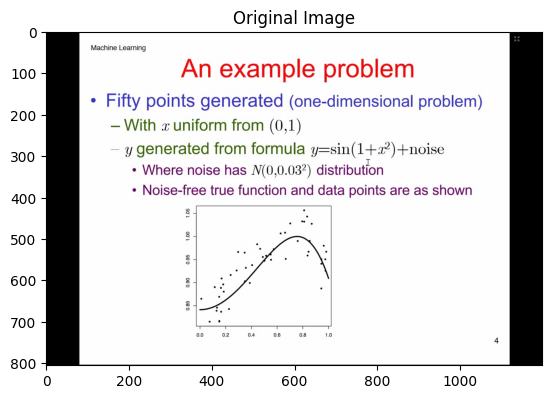

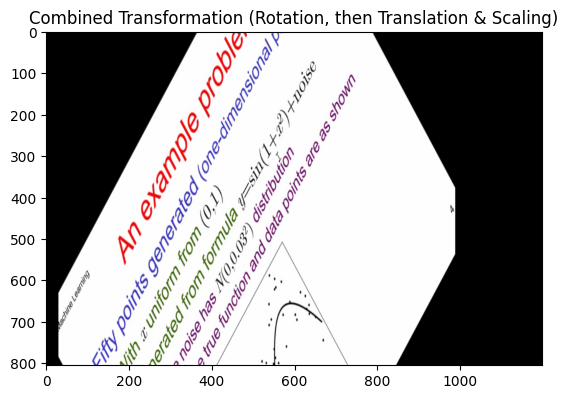

In [25]:

def get_transformation_matrix(dx, dy, sx, sy):
    return np.array([[sx, 0, dx], [0, sy, dy]])


def rotate_image(image, angle):
  radians = np.radians(angle)
  h, w = image.shape[:2]
  center = (w // 2, h // 2)
  rot_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)  # Assuming OpenCV for rotation
  return cv2.warpAffine(image, rot_matrix, (w, h))

def combine_transformations(image, angle, dx, dy, sx, sy):
    # Apply transformations in the correct order (rotation, then translation and scaling)
    rotated_image = rotate_image(image.copy(), angle)
    transform_matrix = get_transformation_matrix(dx, dy, sx, sy)

    # Convert transformation matrix to the correct type (CV_32F) if needed
    if transform_matrix.dtype != np.float32:
        transform_matrix = transform_matrix.astype(np.float32)

    # Check transformation matrix data type and dimensions (for debugging)
    print("Transformation matrix shape:", transform_matrix.shape)
    print("Transformation matrix data type:", transform_matrix.dtype)

    # Ensure that the transformation matrix has two rows and three columns
    if transform_matrix.shape != (2, 3):
        raise ValueError("Transformation matrix should have shape (2, 3)")

    return cv2.warpAffine(rotated_image, transform_matrix, (image.shape[1], image.shape[0]))

# Define transformation parameters
angle = 45
dx = 30
dy = -20
sx = 0.8
sy = 1.5

# Apply combined transformation (order matters!)
combined_image = combine_transformations(image.copy(), angle, dx, dy, sx, sy)

# Apply transformations in a different order (notice the visual difference)
#reordered_image = cv2.warpAffine(get_transformation_matrix(dx, dy, sx, sy), rotate_image(image.copy(), angle), (image.shape[1], image.shape[0]))

# Visualize results
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title("Combined Transformation (Rotation, then Translation & Scaling)")
plt.show()

#plt.imshow(cv2.cvtColor(reordered_image, cv2.COLOR_BGR2RGB))
#plt.title("Reordered Transformation (Translation & Scaling, then Rotation)")
#plt.show()
